## Handling Data Type Errors in Pandas

In [1]:
#Mistaken Code
# Importing the pandas library for data manipulation
import pandas as pd  

# Creating a dictionary with Name, Age, and Gender data
data = {'Name': ['Alice', 'Bob', 'Charlie'], 
        'Age': [25, 30, 'Thirty-Five'],  # Incorrect: 'Thirty-Five' is a string instead of a number
        'Gender': ['F', 'M', 'M']}  

# Converting the dictionary to a DataFrame
df = pd.DataFrame(data)

# Attempting to calculate the average age
# Error: The 'Age' column has a string value ('Thirty-Five'), which will cause a TypeError
average_age = df['Age'].mean()

# Printing the result
print(f"Average Age: {average_age}")


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [2]:
#Corrected Code
import pandas as pd

# Creating a dataset with names, ages, and genders
data = {'Name': ['Alice', 'Bob', 'Charlie'], 
        'Age': [25, 30, 'Thirty-Five'],  # 'Thirty-Five' is not a number
        'Gender': ['F', 'M', 'M']}

# Converting the data to a DataFrame
df = pd.DataFrame(data)

# Convert 'Age' to numeric and handle non-numeric values using 'coerce' (replaces them with NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate the average age, ignoring NaN values
average_age = df['Age'].mean()

# Print the result
print(f"Average Age: {average_age}")



Average Age: 27.5


## Fixing Percentile Calculation Error using NumPy in Data Analysis

In [3]:
#Mistaken Code
import numpy as np

# Creating a dataset with numbers from 1 to 10
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Attempting to calculate the 25th percentile (Q1) and 75th percentile (Q3) using incorrect syntax
q1, q3 = np.percentile(data, 25, 75)  # Incorrect syntax

# Print the percentiles
q1, q3


AxisError: axis 75 is out of bounds for array of dimension 1

In [4]:
q1, q3 = np.percentile(data, [25, 75])  # Correct syntax
print(f"Q1: {q1}, Q3: {q3}")

Q1: 3.25, Q3: 7.75


## Identifying Outliers Using Z-Score in Data Analysis

In [5]:
# Mistaken Code
import numpy as np
from scipy.stats import zscore

data = [1, 2, 3, 100, 5, 6, 7, 8, 9]

# Incorrect: Applying zscore directly with a comparison results in an error
outliers = [i for i in data if zscore(data) > 2]  


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
# Corrected Code
import numpy as np
from scipy.stats import zscore

data = [1, 2, 3, 100, 5, 6, 7, 8, 9]

# Calculate Z-scores for each data point
z_scores = zscore(data)

# Correct: Identify outliers using element-wise comparison
outliers = [data[i] for i in range(len(data)) if abs(z_scores[i]) > 2]

print("Outliers:", outliers)


Outliers: [100]


## Handling Outliers Using Median Replacement with Z-Score

In [7]:
import numpy as np
from scipy.stats import zscore

data = [1, 2, 3, 100, 5, 6, 7, 8, 9]
median = np.median(data)

# Incorrect: Using zscore directly on individual data points instead of the entire dataset
data = [median if abs(zscore(x)) > 2 else x for x in data]

AxisError: axis 0 is out of bounds for array of dimension 0

In [8]:
import numpy as np
from scipy.stats import zscore

data = [1, 2, 3, 100, 5, 6, 7, 8, 9]

# Calculate Z-scores for the entire dataset
z_scores = zscore(data)
median = np.median(data)

# Correct: Replace outliers with the median using proper Z-score comparison
data = [median if abs(z_scores[i]) > 2 else data[i] for i in range(len(data))]
print(data)

[1, 2, 3, 6.0, 5, 6, 7, 8, 9]


## Fixing Standard Deviation Error in PDF Calculation

In [9]:
from scipy.stats import norm

# Incorrect: Using a negative value for standard deviation, which is invalid
pdf_val = norm.pdf(2, 0, -1)
pdf_val


nan

In [10]:
from scipy.stats import norm

# Correct: Using a valid positive standard deviation
pdf_val = norm.pdf(2, 0, 1)
pdf_val

0.05399096651318806

## Fixing KeyError in Seaborn Pairplot

KeyError: 'C'

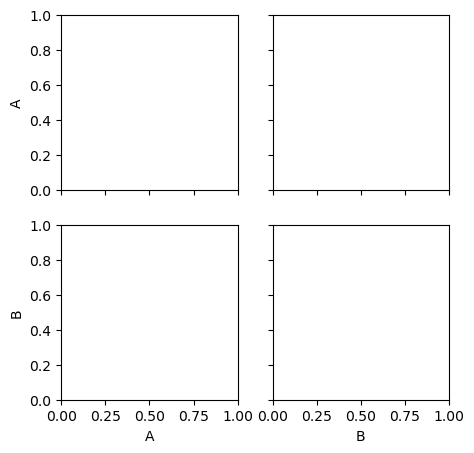

In [11]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Incorrect: 'C' column doesn't exist in the DataFrame, causing a KeyError
sns.pairplot(df, hue='C')  


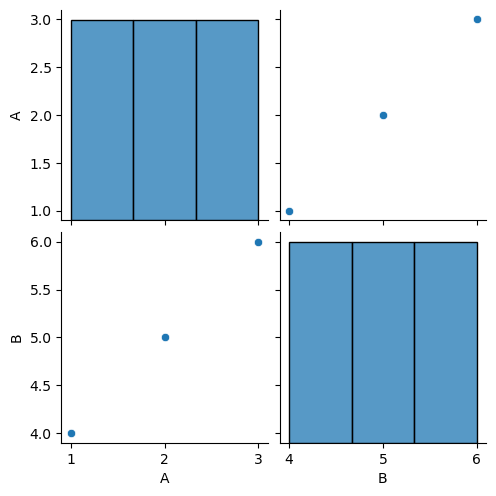

In [13]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Correct: Plotting without the hue parameter since no categorical column exists
sns.pairplot(df)

## Fixing Missing Input Error in Covariance Calculation

In [14]:
import numpy as np

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

# Incorrect: np.cov() requires input data, missing arguments will raise an error
cov_matrix = np.cov() 

TypeError: cov() missing 1 required positional argument: 'm'

In [15]:
import numpy as np

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

# Correct: Providing both x and y as inputs to calculate the covariance matrix
cov_matrix = np.cov(x, y)
cov_matrix

array([[1.66666667, 3.33333333],
       [3.33333333, 6.66666667]])

## Fixing Undefined Function Error in Mean Calculation

In [16]:
import numpy as np

data = [2, 4, 6, 8, 10]

# Incorrect: 'mean()' is not defined. Should use 'np.mean()' instead.
mean_value = mean(data)
print(f"Mean: {mean_value}")

NameError: name 'mean' is not defined

In [17]:
import numpy as np

data = [2, 4, 6, 8, 10]

# Correct: Using 'np.mean()' to calculate the mean value.
mean_value = np.mean(data)
print(f"Mean: {mean_value}")

Mean: 6.0


## Fixing NaN Value Replacement Error in Pandas DataFrame

In [18]:
import pandas as pd
import numpy as np

# Creating a DataFrame with NaN values
data = {'A': [1, 2, np.nan, 4], 'B': [np.nan, 5, 6, np.nan]}
df = pd.DataFrame(data)

# Incorrect: Using 'inplace=False' without assigning it back to df, so changes are not reflected
df.replace(np.nan, 0, inplace=False)  
print(df)

     A    B
0  1.0  NaN
1  2.0  5.0
2  NaN  6.0
3  4.0  NaN


In [19]:
import pandas as pd
import numpy as np

# Creating a DataFrame with NaN values
data = {'A': [1, 2, np.nan, 4], 'B': [np.nan, 5, 6, np.nan]}
df = pd.DataFrame(data)

# Correct: Using 'fillna()' with 'inplace=True' to replace NaN values directly
df.fillna(0, inplace=True)  
print(df)

     A    B
0  1.0  0.0
1  2.0  5.0
2  0.0  6.0
3  4.0  0.0


## Fixing Correlation Calculation Error in Data Analysis

In [20]:
import numpy as np
import pandas as pd

# Creating a DataFrame
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)

# Incorrect: Attempting to find the correlation without specifying columns
correlation = np.corrcoef()
print("Correlation:\n", correlation)

TypeError: corrcoef() missing 1 required positional argument: 'x'

In [21]:
import numpy as np
import pandas as pd

# Creating a DataFrame
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)

# Correct: Specify columns to find correlation
correlation = np.corrcoef(df['A'], df['B'])
print("Correlation:\n", correlation)

Correlation:
 [[1. 1.]
 [1. 1.]]
